In [1]:
import semicon
import sympy
sympy.init_printing()

In [2]:
model = semicon.models.ZincBlende(
    components=['foreman', 'zeeman'], 
    bands=['gamma_6c'],
    default_databank='winkler',
)

In [3]:
model.hamiltonian

⎡                             2   2        2    2        2    2               
⎢B_z⋅g_c⋅μ_B             γ₀⋅h̅ ⋅kₓ    γ₀⋅h̅ ⋅k_y    γ₀⋅h̅ ⋅k_z                
⎢─────────── + E₀ + Eᵥ + ────────── + ─────────── + ───────────               
⎢     2                     2⋅m₀          2⋅m₀          2⋅m₀                  
⎢                                                                             
⎢                                                                             
⎢                     g_c⋅μ_B⋅(Bₓ + ⅈ⋅B_y)                         B_z⋅g_c⋅μ_B
⎢                     ────────────────────                       - ───────────
⎣                              2                                        2     

                                                   ⎤
         g_c⋅μ_B⋅(Bₓ - ⅈ⋅B_y)                      ⎥
         ────────────────────                      ⎥
                  2                                ⎥
                                                   ⎥
                  2   2

In [4]:
model.bands

['gamma_6c']

In [5]:
model.parameters(material='InAs')

{'E_0': 0.418, 'Delta_0': 0.38, 'P': 0.9197, 'g_c': -14.9, 'gamma_1': 2.6959795187642825, 'gamma_2': -0.5520102406178573, 'gamma_3': 0.24798975938214163, 'kappa': -1.2520102406178584, 'q': 0.39, 'gamma_0': 43.66812227074236, 'E_v': 0, 'm_0': 510998.94609999994, 'phi_0': 4135.667662, 'mu_B': 5.7883818012e-05, 'hbar': 197.3269788}

# continuum dispersion

In [6]:
import kwant
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

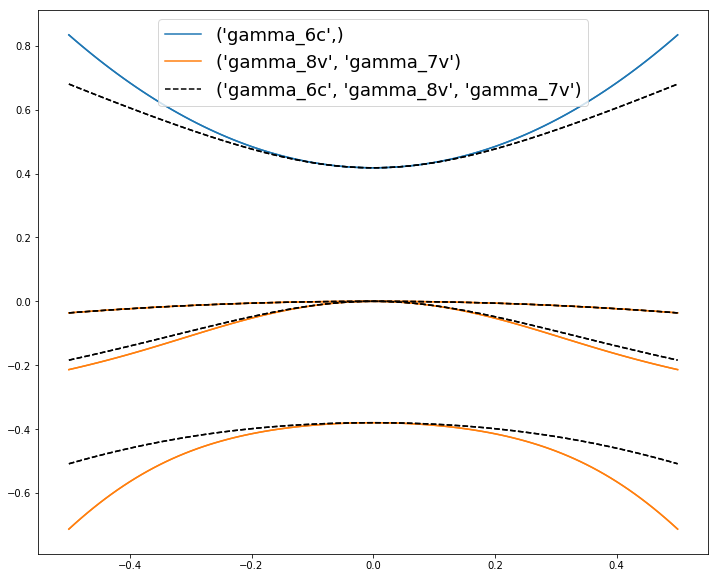

In [7]:
def plot(bands, style, new_gamma_0=None):
    
    model = semicon.models.ZincBlende(
        bands=bands,
        components=('foreman',),
        default_databank='winkler'
    )
    
    if new_gamma_0 is not None:
        params = model.parameters(material='InAs').renormalize(new_gamma_0=1)
    else:
        params = model.parameters(material='InAs')
        
    disp = kwant.continuum.lambdify(str(model.hamiltonian), locals=params)
    h_k = lambda kx, ky, kz: disp(k_x=kx, k_y=ky, k_z=kz)
    
    k = np.linspace(-.5, .5, 101)
    e = np.array([la.eigvalsh(h_k(ki, 0, 0)) for ki in k])
    
    plt.plot(k, e, style)
    plt.plot([], [], style, label=bands)
    
    
plt.figure(figsize=(12, 10))

plot(bands=('gamma_6c',), style='C0')
plot(bands=('gamma_8v', 'gamma_7v'), style='C1')
plot(bands=('gamma_6c', 'gamma_8v', 'gamma_7v'), style='k--')

plt.legend(prop={'size': 18})    